# Projeto Prático #5


Aplicação de intensidade em uma figura qualquer, utilizando **transformações logarítmica**, **gama** e **negativa** a fim de observar as diferenças em cada uma desses filtros.

Alunos: 
- Luiz Eduardo Fernandes
- Rafaela dos Santos Sousa

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def info_image(image):
    print('Largura em pixels: ', end='')
    print(image.shape[1]) 
    print('Altura em pixels: ', end='')
    print(image.shape[0])

def negative_trans_openCV(imageNN):
    imageNeg = cv2.bitwise_not(imageNN)
    cv2.imwrite("img/negative_trans_openCV.jpg", imageNeg)
    histogram(imageNeg,"Image with Negative Transformation (bitwise_not)")
    
    
def negative_trans_manual(imageN):
    imageNeg = 255 - imageN
    cv2.imwrite("img/negative_trans_manual.jpg", imageNeg)
    histogram(imageNeg,"Image with Negative Transformation (Manual)")

def log_trans_manual(imageL):
    imageL = np.uint8(np.log1p(imageL))

    c = 40
    prop = imageL.shape

    for i in range(0, prop[0]):
        for j in range(0, prop[1]):
            imageL[i][j] = c* np.log(imageL[i][j] + 1)
    

    cv2.imwrite("img/log_trans_manual.jpg", imageL)
    histogram(imageL,"Image with Logarithmic Transformation")
    
def gamma_trans_manual(imageG, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    imageG = cv2.LUT(imageG, table)
    cv2.imwrite("img/gamma_trans_manual.jpg", imageG)
    histogram(np.copy(imageG),"Image with Gamma Transformation")
    
def histogram(image, name):
    h = cv2.calcHist([image], [0], None, [256], [0, 255])
    
    fig, ax = plt.subplots()
    plt.subplot(1, 2, 1)
    plt.title("Histograma " + name)
    plt.xlabel("Intensidade")
    plt.ylabel("Qtd de Pixels")
    plt.plot(h)
    plt.xlim([0, 256])
     
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    fig.set_size_inches(18.5, 10.5)
    plt.subplots_adjust(wspace=0.2)
    plt.savefig('img/'+name+'.jpg')

## Figura Original

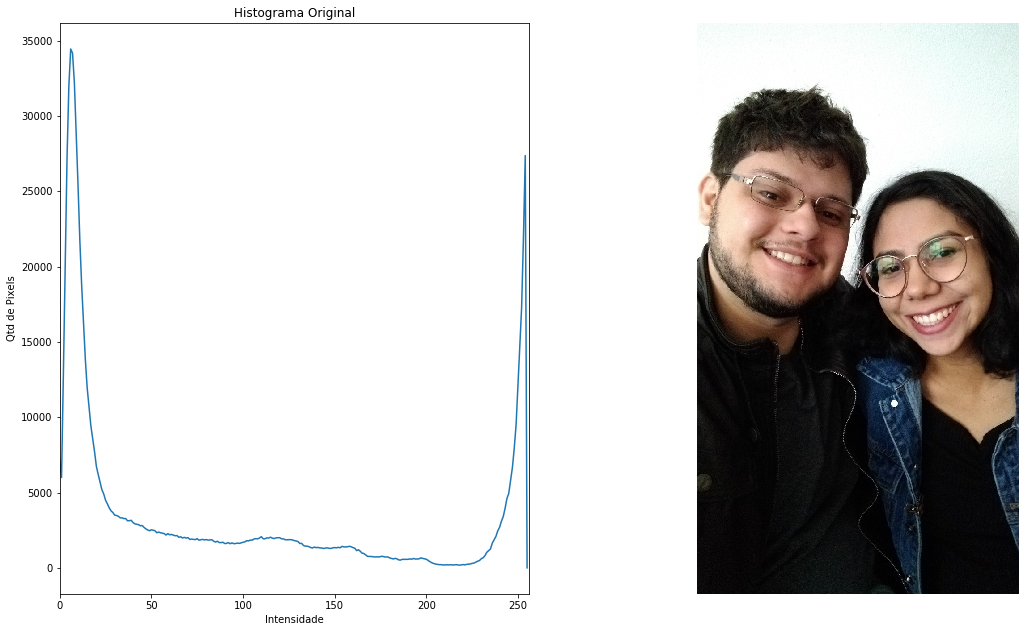

In [2]:
image = cv2.imread('img\entrada.jpeg')
histogram(image, "Original")

## Transformação Negativa

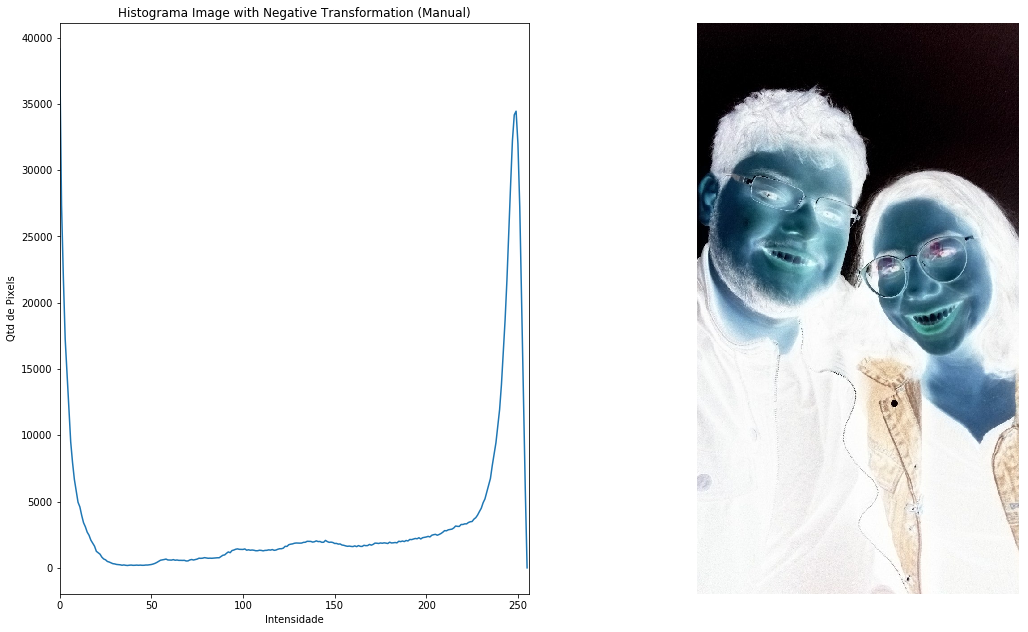

In [3]:
image = cv2.imread('img\entrada.jpeg')
negative_trans_manual(image)

## Transformação Logarítmica

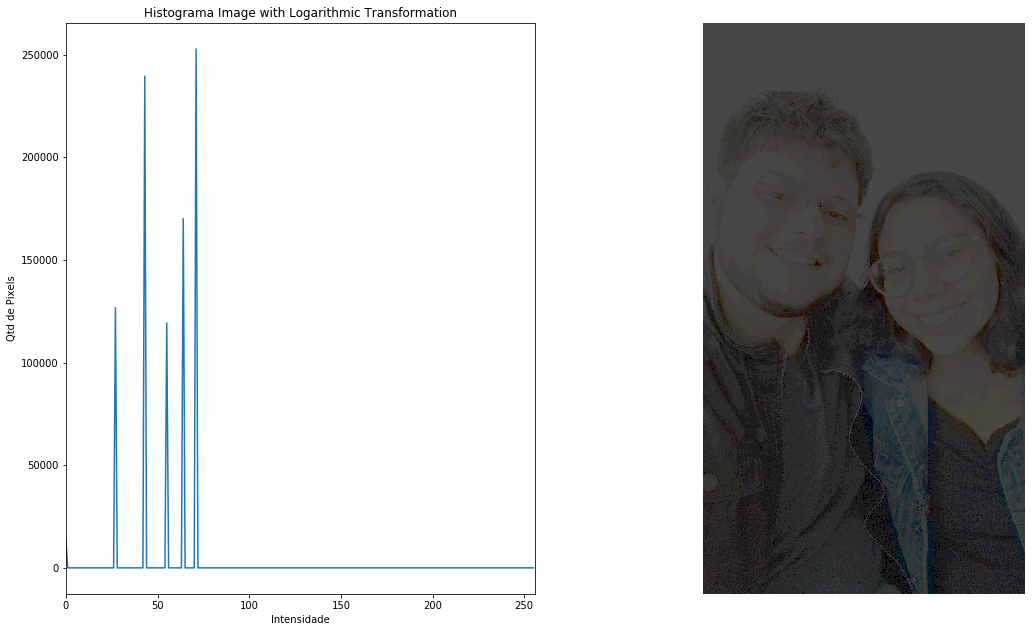

In [4]:
image = cv2.imread('img\entrada.jpeg')
log_trans_manual(image)

## Transformação Gamma

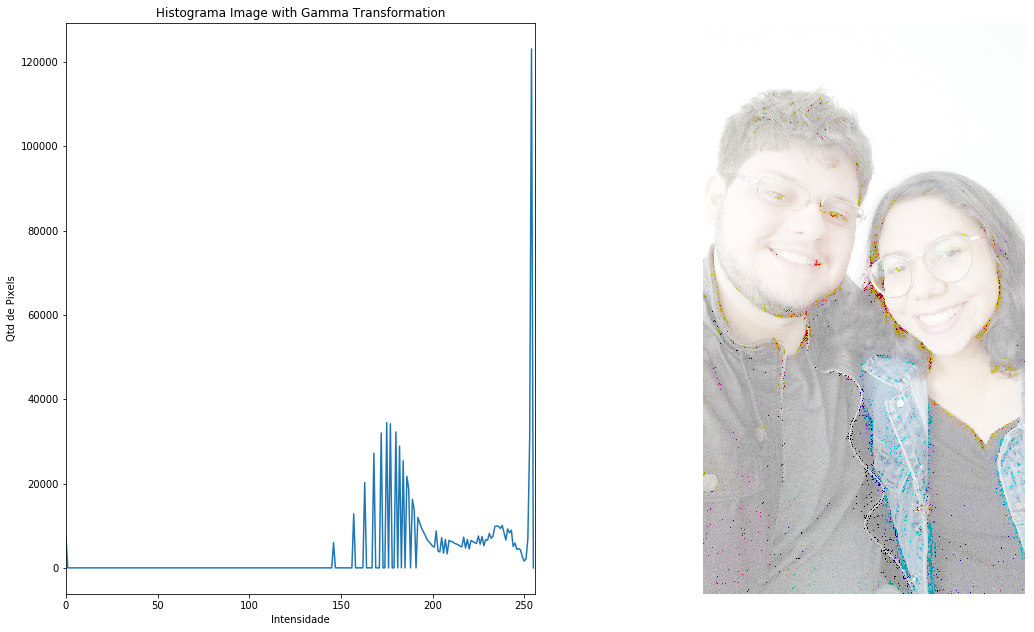

In [5]:
image = cv2.imread('img\entrada.jpeg')
gamma_trans_manual(image,10)